In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import ast
import os
import random
import shutil
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import glob
import collections
import itertools
import cv2

In [12]:

# @title
def plot_rgb_values(image, resize_width=None, resize_height=None):
    if resize_width is not None and resize_height is not None:
        image = image.resize((resize_width, resize_height))

    rgb_image = image.convert('RGB')
    red_channel, green_channel, blue_channel = rgb_image.split()

    num_pixels = red_channel.size[0] * red_channel.size[1]
    indices = range(num_pixels)

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    axes[1].imshow(rgb_image)
    axes[1].set_title('Converted Image')
    axes[1].axis('off')

    axes[0].plot(indices, red_channel.getdata(), color='red')
    axes[0].plot(indices, green_channel.getdata(), color='green')
    axes[0].plot(indices, blue_channel.getdata(), color='blue')
    axes[0].set_xlabel('Pixel Index')
    axes[0].set_ylabel('RGB Value')
    axes[0].set_title('RGB Values of Image')

    plt.tight_layout()
    plt.show()

In [13]:
# @title
def plot_pixel_frequency(image, resize_width=None, resize_height=None):
    if resize_width is not None and resize_height is not None:
        image = image.resize((resize_width, resize_height))

    image = image.convert('RGB')

    pixel_values = np.mean(image, axis=2).flatten()

    plt.figure(figsize=(12, 5))
    plt.hist(pixel_values, bins=256, range=(0, 255))
    plt.xlabel('Average Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Average Pixel Value Frequency Distribution')
    plt.show()

In [14]:
# @title
def rgb_frequency(image, resize_width=None, resize_height=None):
  if resize_width is not None and resize_height is not None:
        image = image.resize((resize_width, resize_height))

  img_array = np.array(image)  # Convert PIL image to NumPy array
  color = ('b', 'g', 'r')
  plt.figure(figsize=(12, 5))
  for i, col in enumerate(color):
      hist = np.histogram(img_array[:, :, i], bins=256, range=(0, 256))
      plt.plot(hist[1][:-1], hist[0], color=col)
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')
  plt.title('Pixel Value Frequency Distribution')
  plt.show()

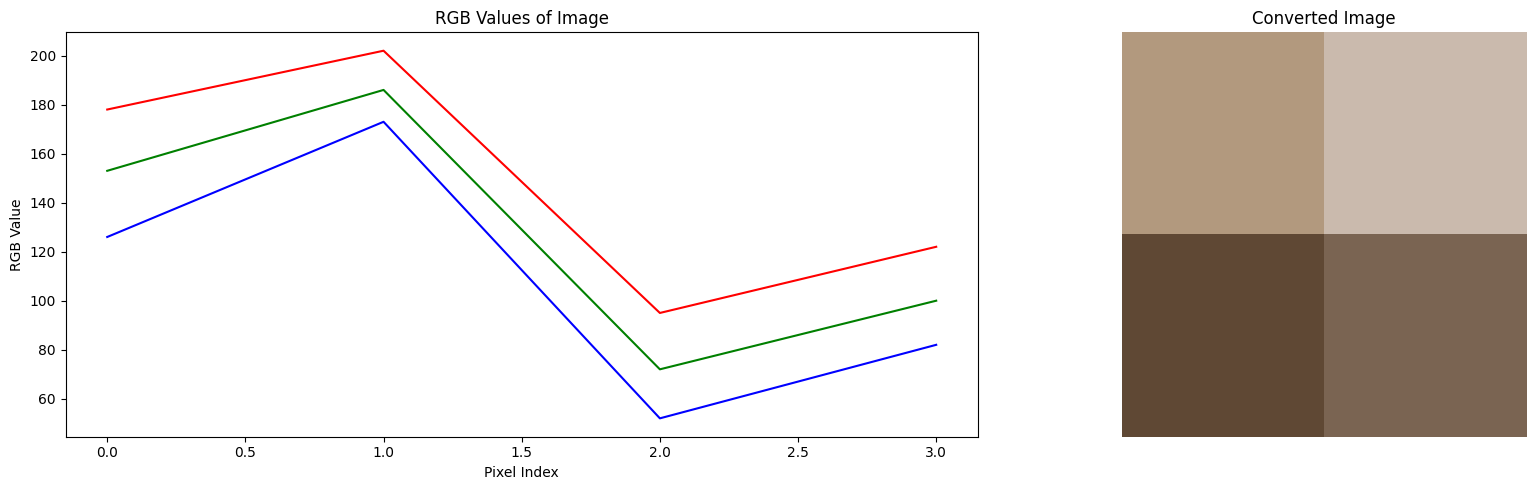

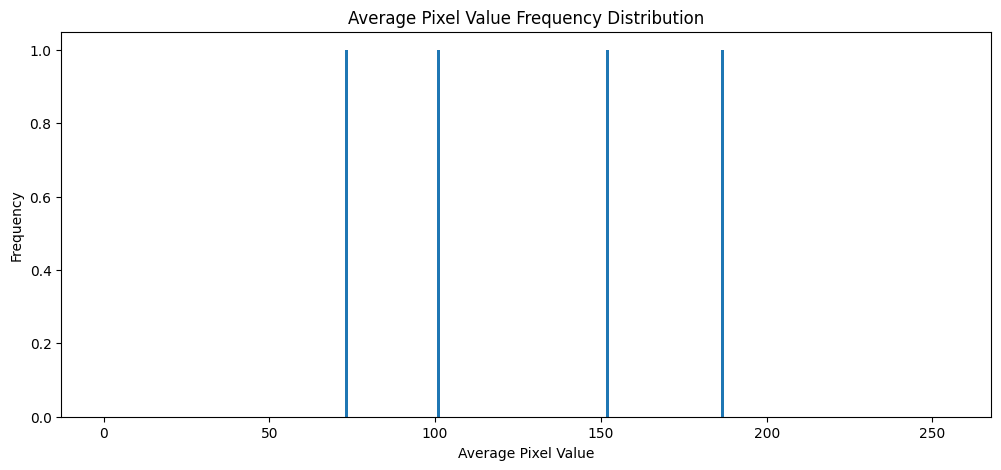

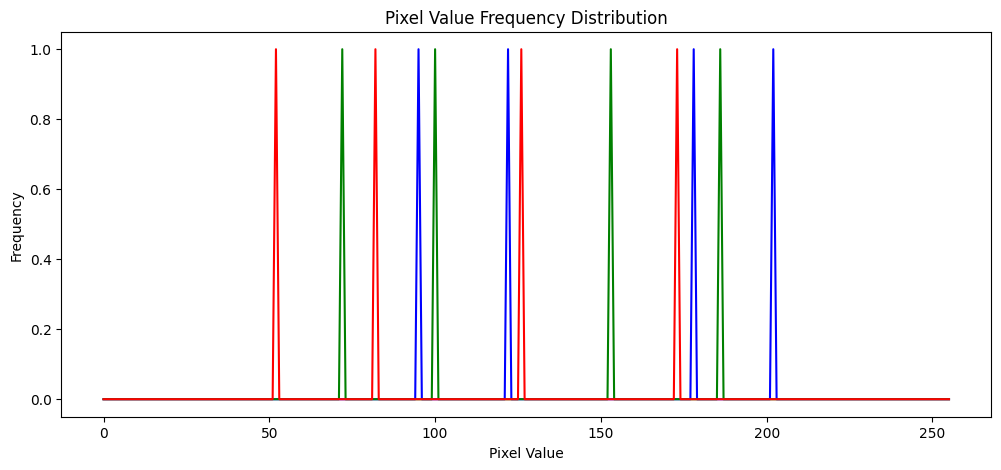

In [15]:
# @title
img_path = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/g1.jpeg'
# img_path = '/content/drive/MyDrive/Colab_Skin_Disease/TEST Images/WIN_20230720_14_25_13_Pro.jpg'
resize_width= 2 #None
resize_height= 2 #None
image = Image.open(img_path)

plot_rgb_values(image,resize_width,resize_height)
print()
plot_pixel_frequency(image,resize_width,resize_height)
print()
rgb_frequency(image,resize_width,resize_height)

In [16]:
# @title
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)

    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')

    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')
    plt.show()

In [17]:
# @title
def pixel_frequency_comparison(img1, img2, title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    pixel_values1 = np.mean(img1, axis=2).flatten()
    axes[0].hist(pixel_values1, bins=256, range=(0, 255))
    axes[0].set_xlabel('Average Pixel Value')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Orignal')

    pixel_values2 = np.mean(img2, axis=2).flatten()
    axes[1].hist(pixel_values2, bins=256, range=(0, 255))
    axes[1].set_xlabel('Average Pixel Value')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(title)

    plt.ticklabel_format(style='plain')
    plt.tight_layout()
    plt.show()

In [18]:
# @title
def rgb_values_comparison(img1, img2, title):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  # For image 1
  img_array = np.array(img1)  # Convert PIL image to NumPy array
  color = ('b', 'g', 'r')
  for i, col in enumerate(color):
      hist = np.histogram(img_array[:, :, i], bins=256, range=(0, 256))
      axes[0].plot(hist[1][:-1], hist[0], color=col)
  axes[0].set_xlabel('Pixel Value')
  axes[0].set_ylabel('Frequency')
  axes[0].set_title('Orignal')

  # For image 2
  img_array = np.array(img2)  # Convert PIL image to NumPy array
  color = ('b', 'g', 'r')
  for i, col in enumerate(color):
      hist = np.histogram(img_array[:, :, i], bins=256, range=(0, 256))
      axes[1].plot(hist[1][:-1], hist[0], color=col)
  axes[1].set_xlabel('Pixel Value')
  axes[1].set_ylabel('Frequency')
  axes[1].set_title(title)

  plt.tight_layout()
  plt.show()

In [19]:
# @title
def normalize_for_display(data):
    # Normalize the data to the range [0, 255]
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min) * 255
    return normalized_data.astype(np.uint8)

def fourier_comparison(img1, img2, title):
    # Apply Fourier Transform to both images
    f_transform1 = np.fft.fft2(img1, axes=(0, 1))
    f_shift1 = np.fft.fftshift(f_transform1)

    f_transform2 = np.fft.fft2(img2, axes=(0, 1))
    f_shift2 = np.fft.fftshift(f_transform2)

    # Compute magnitude spectra for both images
    magnitude_spectrum1 = 20 * np.log(np.abs(f_shift1))
    magnitude_spectrum2 = 20 * np.log(np.abs(f_shift2))

    # Normalize the data for visualization
    magnitude_spectrum1 = normalize_for_display(magnitude_spectrum1)
    magnitude_spectrum2 = normalize_for_display(magnitude_spectrum2)

    # Plot the magnitude spectra side by side
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    axes[0].imshow(magnitude_spectrum1,cmap='gray')
    axes[0].set_title('Orignal')
    axes[0].axis('off')

    axes[1].imshow(magnitude_spectrum2,cmap='gray')
    axes[1].set_title(title)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

1. Structural Similarity Index (SSIM):

* SSIM is a widely used image quality metric that measures the structural similarity between two images. It compares the luminance, contrast, and structure of the images to estimate how similar they are.
* The SSIM index ranges between -1 and 1. A value closer to 1 indicates higher similarity, while a value closer to -1 indicates more dissimilarity.
* A higher SSIM value between the "Tranformed" and "Original" images would indicate a better quality transform effect.

2. Peak Signal-to-Noise Ratio (PSNR):

* PSNR is another popular image quality metric used to evaluate the distortion between two images.
* It calculates the ratio between the maximum possible power of a signal (in this case, the original image) and the power of the difference between the original and distorted images.
* PSNR is expressed in decibels (dB), and a higher PSNR value signifies less distortion and better image quality.

3. Mean Squared Error (MSE):

* MSE measures the average squared difference between corresponding pixel intensities of the "Transformed" and "Original" images.
* A lower MSE value indicates less distortion and better similarity between the two images.

In [20]:
# @title
def image_stats_comparison(img1,img2,title):
  # # Convert data types and normalize images
  # img1 = img1.astype(np.float32) / 255.0
  # img2 = img2.astype(np.float32) / 255.0

  ssim_index = skimet.structural_similarity(img1, img2, channel_axis=2)
  psnr_value = skimet.peak_signal_noise_ratio(img1, img2)
  mse_value = np.mean((np.abs(img1 - img2) ** 2), axis=(0, 1))

  print('\nSSIM:',ssim_index)
  print('PSNR:',psnr_value)
  print('MSE:',mse_value)

  # For Image 1
  image = np.array(img1)
  mean = np.mean(image)
  median = np.median(image)
  std = np.std(image)
  print('\n>>>> Orignal')
  print('Mean:', mean)
  print('Median:', median)
  print('STD:', std)

  # For Image 2
  image = np.array(img2)
  mean = np.mean(image)
  median = np.median(image)
  std = np.std(image)
  print('\n>>>>', title)
  print('Mean:', mean)
  print('Median:', median)
  print('STD:', std)

In [21]:
from skimage.filters import gaussian
from skimage import color
from skimage.filters import sobel
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.filters
from skimage.util import random_noise
from skimage.filters import threshold_otsu
from PIL import Image, ImageFilter
import albumentations as A
import skimage.metrics as skimet
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

#Import all the enhancement filter from pillow
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)
import os
import random
import matplotlib.colors as mcolors
plt.rcParams['figure.max_open_warning'] = 50000

In [22]:
# @title
img =  plt.imread('/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/jj1.jpeg')

In [23]:
# Making filters dict
filters = {}

transform = A.Compose([
    A.NoOp()
])
filters['Orignal'] = transform

transform = A.Compose([
 A.CLAHE(clip_limit=(2,2), tile_grid_size=(8,8),always_apply=True),
])
filters['CLAHE'] = transform

transform = A.Compose([
    A.Equalize(by_channels=False, always_apply=True)
])
filters['equalize'] = transform

transform = A.Compose([
    A.Emboss(alpha=(1.0, 1.0), strength=(1.0, 1.0), p=1.0),
])
filters['emboss'] = transform

transform = A.Compose([
    A.Emboss(alpha=(1.0, 1.0), strength=(1.0, 1.0), p=1.0),
    A.Equalize(by_channels=False, always_apply=True)
])
filters['emboss_equalize'] = transform

transform = A.Compose([
   A.HueSaturationValue (hue_shift_limit=(0,0), sat_shift_limit=(15,15), val_shift_limit=0, always_apply=True),
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.05,0.05),always_apply=True),
])
filters['saturtion_brightness'] = transform

transform = A.Compose([
    A.Sharpen(alpha=(1.0, 1.0), lightness=(1.0, 1.0), always_apply=True),
    A.RandomBrightnessContrast(brightness_limit=(0.1, 0.1), contrast_limit=(0, 0), always_apply=True),
])
filters['sharpen_brighten'] = transform

transform = A.Compose([
    A.MedianBlur(blur_limit=(9, 9), always_apply=True),
])
filters['median_blur'] = transform

transform = A.Compose([
    A.MultiplicativeNoise(multiplier=(0.5, 0.5), per_channel=False, elementwise=False, always_apply=True),
    A.RandomBrightnessContrast(brightness_limit=(0.1, 0.1), contrast_limit=(0.9, 0.9), always_apply=True)
])
filters['multi_noise_brighten'] = transform

transform = A.Compose([
    A.Downscale(scale_min=0.25, scale_max=0.25, interpolation=None, always_apply=True),
])
filters['downscale'] = transform

In [24]:
def plot_all_filters(filters, image,img_name):
  n_cols = 3
  n_rows = len(filters)
  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10*n_cols, 9*n_rows)) #figsize=(width, height)
  plt.subplots_adjust(hspace=0.5,wspace=0.05)
  # fig.suptitle(f"Filters on {img_name}", fontsize=18, y=0.95)

  for i, (name, filter) in enumerate(filters.items()):
    # Aplying Filters
    transformed_image = filter(image=image)['image']
    ax[i,0].imshow(transformed_image, cmap=plt.cm.gray)
    ax[i,0].set_title(name,fontsize=18)
    ax[i,0].axis('off')

    # Plotting Histogram
    pixel_values = np.mean(transformed_image, axis=2).flatten()
    ax[i,1].hist(pixel_values, bins=256, range=(0, 255))
    ax[i,1].set_xlabel('Average Pixel Value')
    ax[i,1].set_title(name)

    # Plotting RGB Histogram
    img_array = np.array(transformed_image)
    for channel, color in enumerate(['red', 'green', 'blue']):
        hist = np.histogram(img_array[:, :, channel], bins=256, range=(0, 256))
        ax[i,2].plot(hist[1][:-1], hist[0], color=color)
        # ax[i,2].hist(img_array[:, :, channel].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7)
    ax[i,2].set_xlabel('Pixel Value')
    ax[i,2].set_title(name)

    # # Scatter Plot
    # sampled_values = pixel_values
    # ax[i,3].scatter(range(len(sampled_values)), sampled_values, s=1)
    # ax[i,3].set_xlabel('Pixel Index')
    # ax[i,3].set_ylabel('Pixel Value')
    # ax[i,3].set_title("Scatter Plot")

    # Add a heatmap plot to the last column
    # heatmap = np.mean(image, axis=2)
    # ax[i,4].imshow(heatmap, cmap='hot', norm=mcolors.Normalize())
    # ax[i,4].set_title('Heatmap', fontsize=18)
    # ax[i,4].axis('off')

  plt.ticklabel_format(style='plain')
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_all_filters_hor(filters, image,img_name):
  n_rows = 3
  n_cols = len(filters)
  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(31*n_rows, 5*n_cols)) #figsize=(width, height)
  plt.subplots_adjust(hspace=0.5,wspace=0.05)
  # fig.suptitle(f"Filters on {img_name}", fontsize=18, y=0.95)

  for i, (name, filter) in enumerate(filters.items()):
    # Aplying Filters
    transformed_image = filter(image=image)['image']
    ax[0,i].imshow(transformed_image, cmap=plt.cm.gray)
    ax[0,i].set_title(name,fontsize=18)
    ax[0,i].axis('off')

    # Plotting Histogram
    pixel_values = np.mean(transformed_image, axis=2).flatten()
    ax[1,i].hist(pixel_values, bins=256, range=(0, 255))
    ax[1,i].set_xlabel('Average Pixel Value')
    ax[1,i].set_title(name)

    # Plotting RGB Histogram
    img_array = np.array(transformed_image)
    for channel, color in enumerate(['red', 'green', 'blue']):
        hist = np.histogram(img_array[:, :, channel], bins=256, range=(0, 256))
        ax[2,i].plot(hist[1][:-1], hist[0], color=color)
        # ax[i,2].hist(img_array[:, :, channel].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7)
    ax[2,i].set_xlabel('Pixel Value')
    ax[2,i].set_title(name)

    # # Scatter Plot
    # sampled_values = pixel_values
    # ax[i,3].scatter(range(len(sampled_values)), sampled_values, s=1)
    # ax[i,3].set_xlabel('Pixel Index')
    # ax[i,3].set_ylabel('Pixel Value')
    # ax[i,3].set_title("Scatter Plot")

    # Add a heatmap plot to the last column
    # heatmap = np.mean(image, axis=2)
    # ax[i,4].imshow(heatmap, cmap='hot', norm=mcolors.Normalize())
    # ax[i,4].set_title('Heatmap', fontsize=18)
    # ax[i,4].axis('off')

  plt.ticklabel_format(style='plain')
  plt.tight_layout()
  plt.show()

In [ ]:
folder_path = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
all_files = os.listdir(folder_path)
random.shuffle(all_files)
selected_files = all_files[:5]

for file_name in selected_files:
  full_path = os.path.join(folder_path, file_name)
  img =  plt.imread(full_path)
  plot_all_filters(filters,img,file_name)
  break

# img = plt.imread('/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/e2.jpeg')
# file_name = 'e2.jpeg'
# plot_all_filters(filters,img,file_name)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def multi_image(img):
  for name, filter in filters.items():
    # print(filter)
    transformed_image = filter(image=img)['image']

    plot_comparison(img, transformed_image, name)
    # pixel_frequency_comparison(img, transformed_image, name)
    # fourier_comparison(img, transformed_image, name)
    # rgb_values_comparison(img, transformed_image, name)
    # image_stats_comparison(img, transformed_image, name)
    # break

In [ ]:
# !jupyter nbconvert --to html /content/drive/MyDrive/Colab_Skin_Disease/Image_Processing.ipynb

In [ ]:
folder_path = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12"
all_files = os.listdir(folder_path)
random.shuffle(all_files)
selected_files = all_files[:20]

for file_name in selected_files:
  full_path = os.path.join(folder_path, file_name)
  img =  plt.imread(full_path)
  multi_image(img)
  print(file_name)
  # break



Output hidden; open in https://colab.research.google.com to view.

# 1. CLAHE (Contrast Limited Adaptive Histogram Equalization)
1. Divdes the images into small tiles
2. Applies Histogram Equalization individeually on tiles. This redistributes the intensity values of an image to cover the entire range of possible pixel values, by doing this histogram becomes more uniform, which enhances the contrast of the image.
3. To avoid over-amplification of noise and artifacts, Contrast limiting is applied which puts a cap on the number of pixels that can be amplified at a specific intensity level. This step ensures that the enhancement in each tile is not too extreme.
4. Finally, it combines all the tiles to make the final image.

 **TLDR:** CLAHE helps by dividing the image into small pieces (tiles) and then separately adjusting the brightness of each tile to make the dark areas brighter and the bright areas darker, so you can see more details in the entire image.

---
#### Parameters:

* **clip_limit**: It controls the amount of contrast enhancement applied to each region. Higher values (e.g., 4.0) result in stronger contrast enhancements, while lower values (e.g., 2.0) provide more moderate enhancements. Can also define range (x,y) it will randomly apply any value between x and y.

* **tile_grid_size**: A tuple (height, width) that defines the size of the grid used for dividing the image into small tiles.


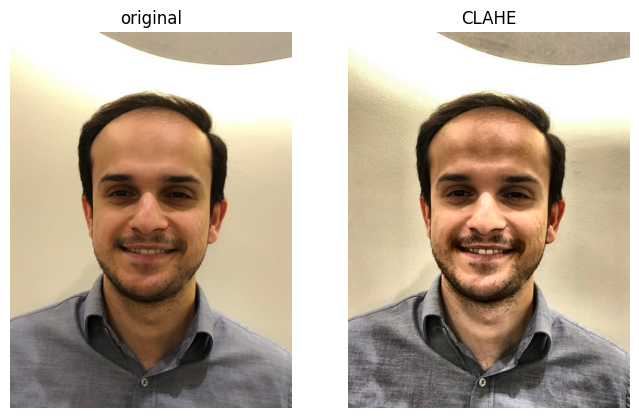

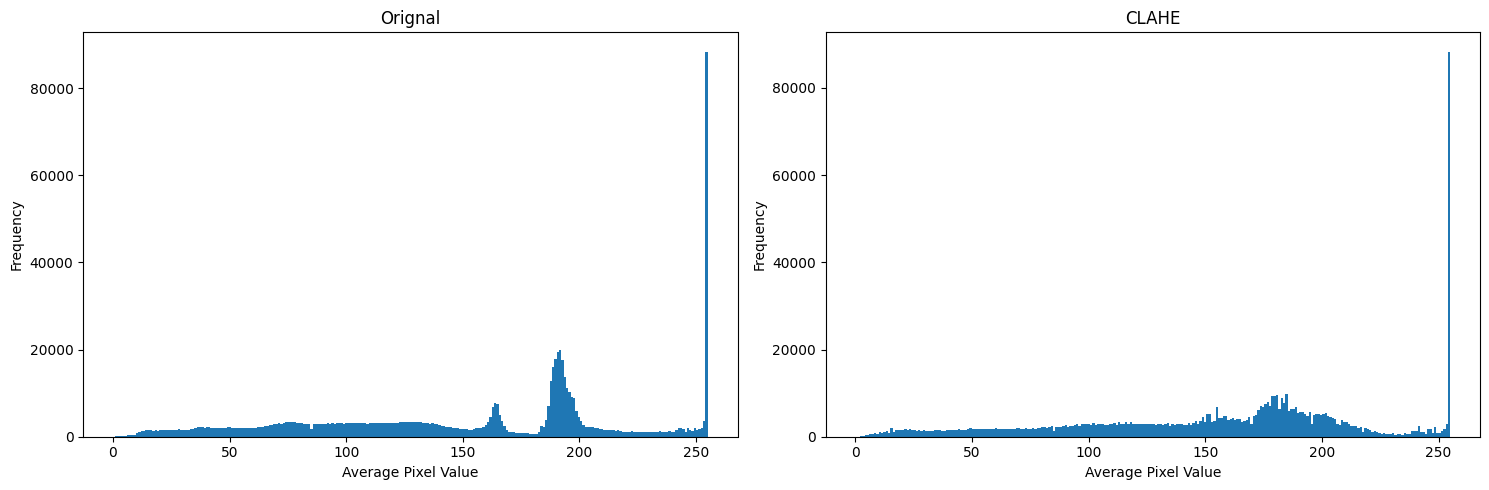

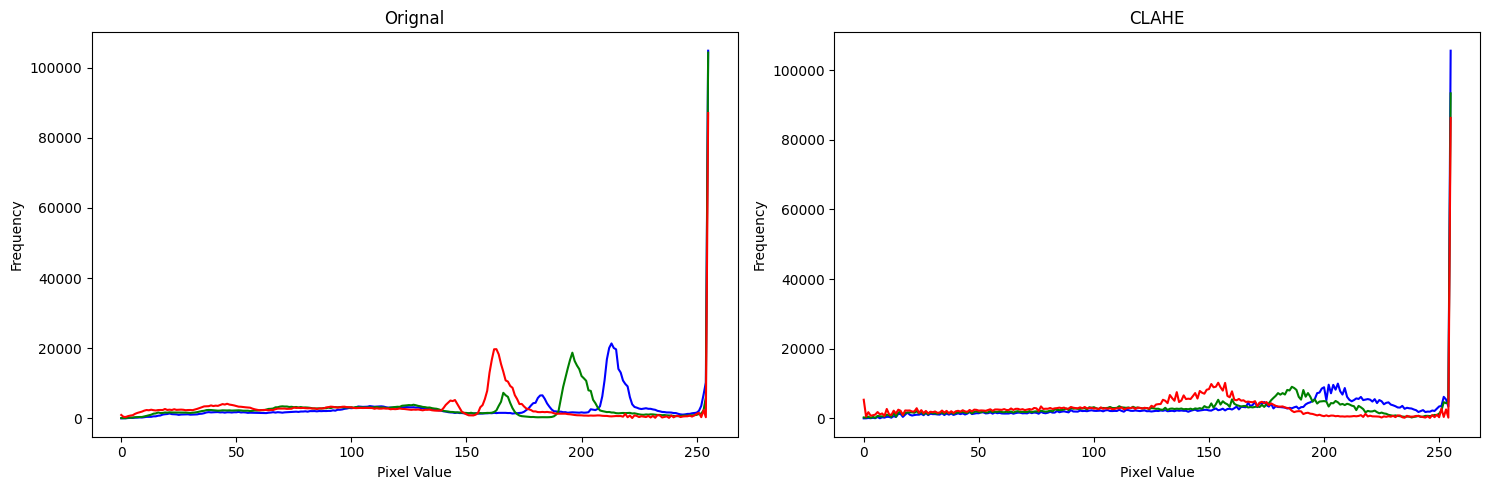

In [ ]:
transform = A.Compose([
 A.CLAHE(clip_limit=(2,2), tile_grid_size=(8,8),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "CLAHE")
pixel_frequency_comparison(img, transformed_image, "CLAHE")
# fourier_comparison(img, transformed_image, "CLAHE")
rgb_values_comparison(img, transformed_image, "CLAHE")
# image_stats_comparison(img, transformed_image, "CLAHE")

# 2. Equalize
This technique is used to enhance the contrast of an image by performing histogram equalization. Histogram equalization redistributes the pixel intensity values in an image to cover the entire dynamic range, resulting in improved contrast and visibility of details.

---
#### Parameters:

* **by_channels**: If set to True, histogram equalization will be applied independently to each channel (RGB). If set to False, the histogram equalization will be applied to the entire image.

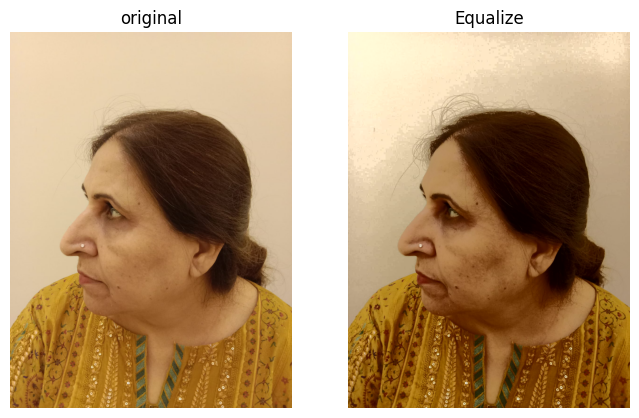

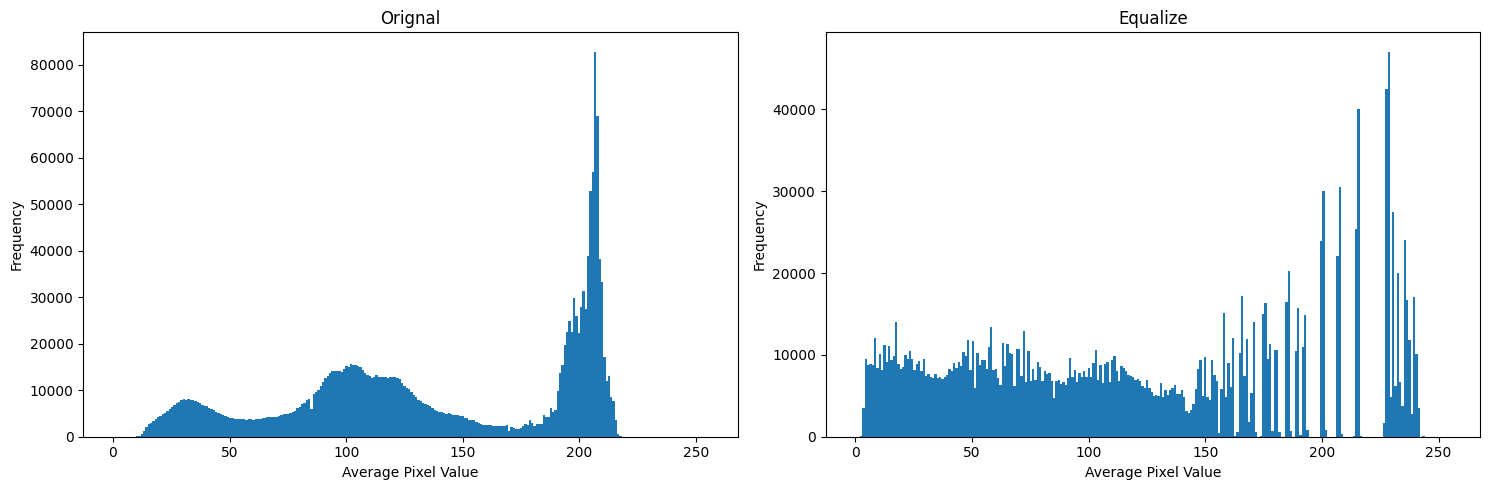

In [ ]:
transform = A.Compose([
      A.Equalize(by_channels=False,always_apply=True)
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Equalize")
pixel_frequency_comparison(img, transformed_image, "Equalize")
# fourier_comparison(img, transformed_image, "Equalize")
# rgb_values_comparison(img, transformed_image, "Equalize")
# image_stats_comparison(img, transformed_image, "Equalize")

# 3. Emboss
It simulates an embossed effect on the image. It creates an illusion of depth by emphasizing the edges and highlights of objects in the image, making them appear as if they are raised or engraved. Then overlays the result with the original image.

---
#### Parameters:

* **alpha**: Range to choose the visibility of the embossed image. At 0, only the original image is visible,at 1.0 only its embossed version is visible. Default: (0.2, 0.5).

* **strength**: Range of strength of embossing. Default: (0.2, 0.7).


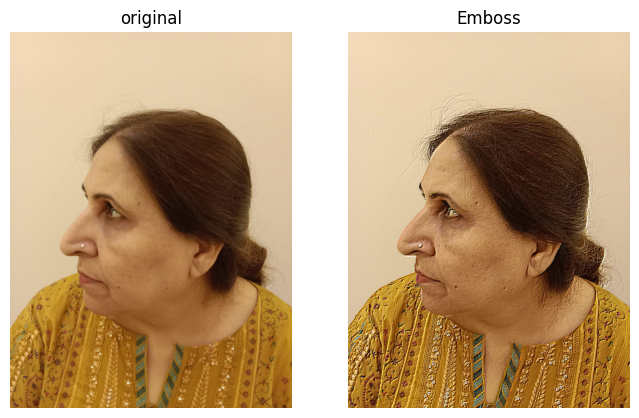

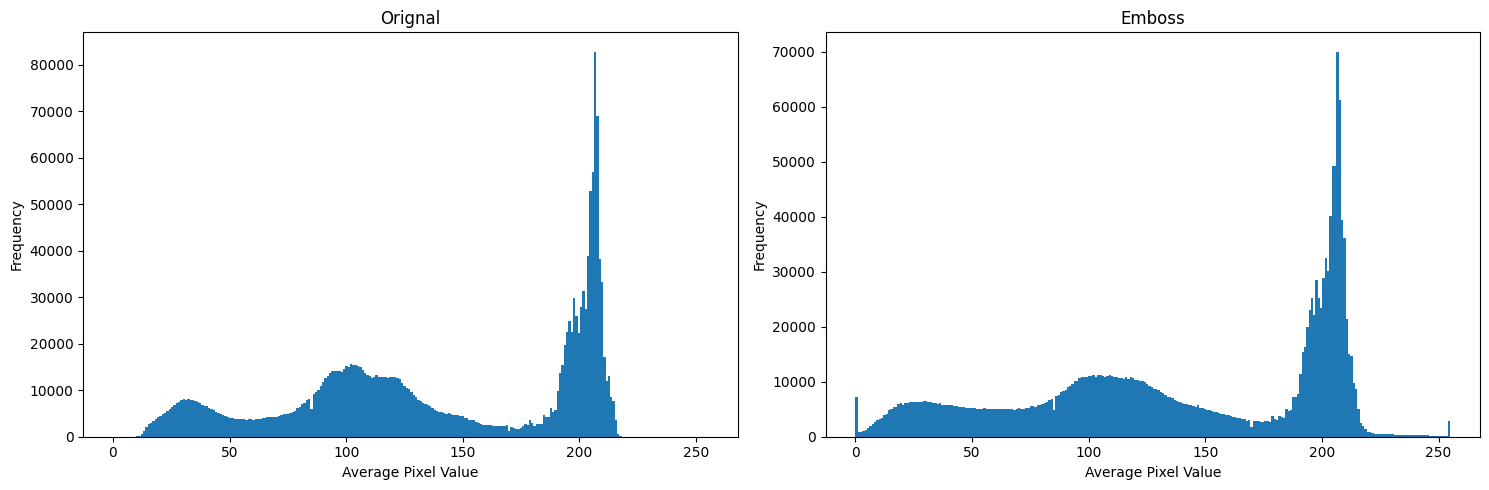

In [ ]:
transform = A.Compose([
      A.Emboss(alpha=(1.0, 1.0),strength=(1.0, 1.0), p=1.0),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Emboss")
pixel_frequency_comparison(img, transformed_image, "Emboss")
# rgb_values_comparison(img, transformed_image, "Emboss")
# image_stats_comparison(img, transformed_image, "Emboss")

# 4. Emboss + Equalize

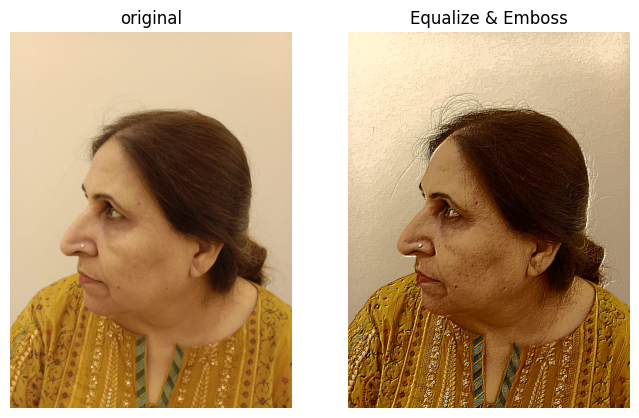

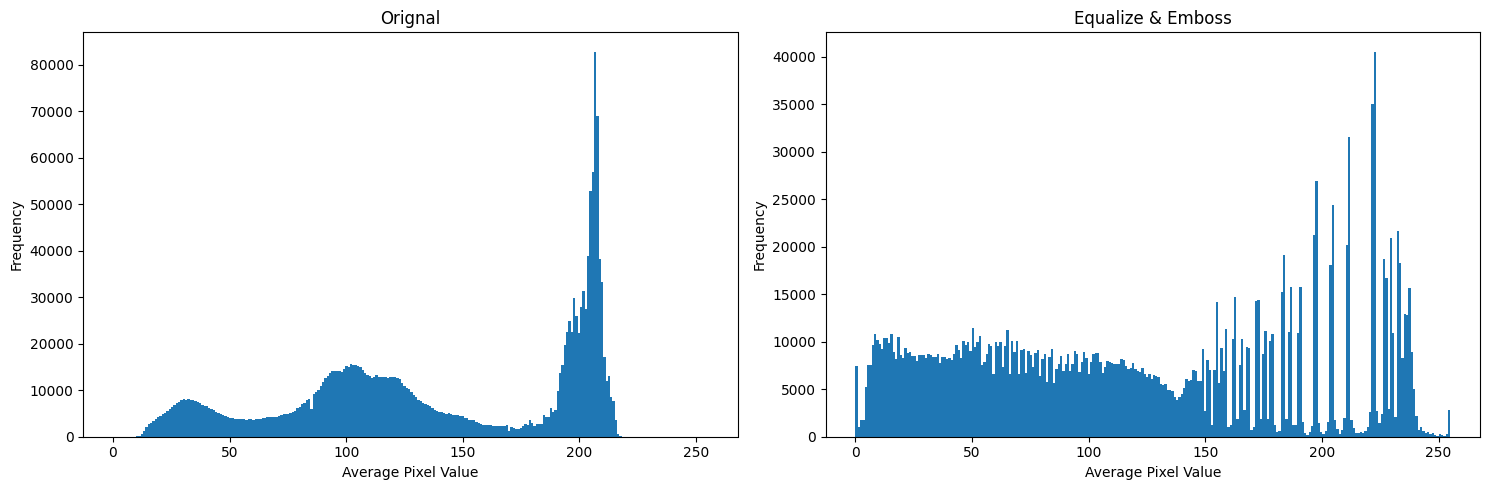

In [ ]:
transform = A.Compose([
      A.Emboss(alpha=(1.0, 1.0),strength=(1.0, 1.0), p=1.0),
      A.Equalize(by_channels=False,always_apply=True)
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Equalize & Emboss")
pixel_frequency_comparison(img, transformed_image, "Equalize & Emboss")
# fourier_comparison(img, transformed_image, "Equalize & Emboss")
# rgb_values_comparison(img, transformed_image, "Equalize & Emboss")
# image_stats_comparison(img, transformed_image, "Equalize & Emboss")

# 5. Saturation + Brightness
---
#### Parameters:

* **hue_shift_limit**: The hue shift limit controls the range of random hue adjustments.
* **sat_shift_limit**: The saturation shift limit controls the range of random saturation adjustments.
* **val_shift_limit**: The value shift limit controls the range of random brightness adjustments.

__
* **brightness_limit**: The brightness limit controls the range of random brightness adjustments

* **contrast_limit**: The contrast limit controls the range of random contrast adjustments

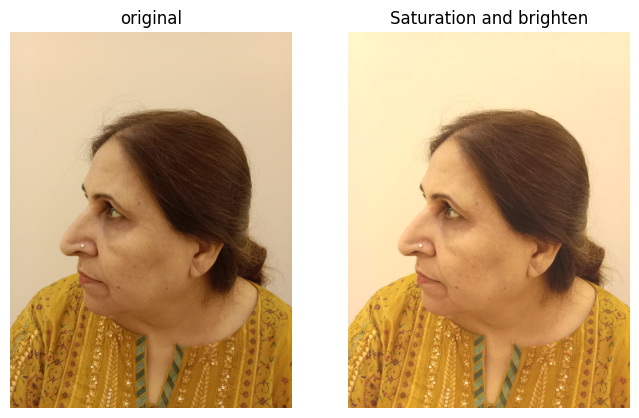

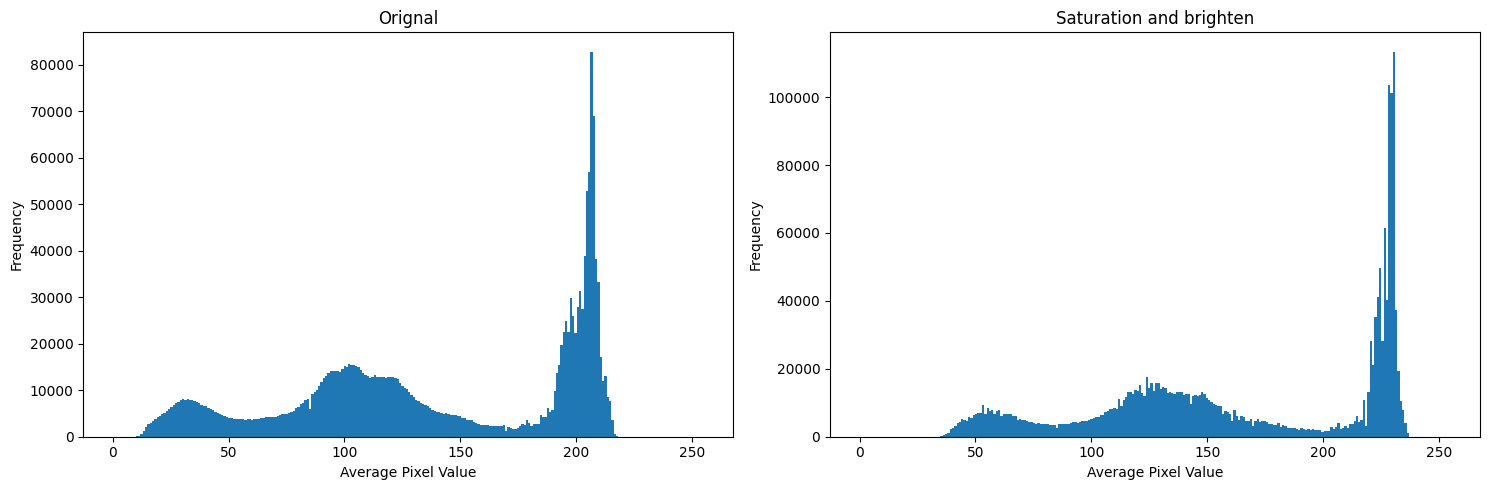

In [ ]:
transform = A.Compose([
   A.HueSaturationValue (hue_shift_limit=(0,0), sat_shift_limit=(15,15), val_shift_limit=0, always_apply=True),
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.05,0.05),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Saturation and brighten")
pixel_frequency_comparison(img, transformed_image, "Saturation and brighten")
# fourier_comparison(img, transformed_image, "Saturation and brighten")
# rgb_values_comparison(img, transformed_image, "Saturation and brighten")
# image_stats_comparison(img, transformed_image, "Saturation and brighten")

# 6. Sharpen + Brightness
---
#### Parameters:

* **alpha**: Range to choose the visibility of the sharpened image. At 0, only the original image is visible, at 1.0 only its sharpened version is visible. Default: (0.2, 0.5).
* **lightness**: Range to choose the lightness of the sharpened image. Default: (0.5, 1.0).

__
* **brightness_limit**: The brightness limit controls the range of random brightness adjustments

* **contrast_limit**: The contrast limit controls the range of random contrast adjustments

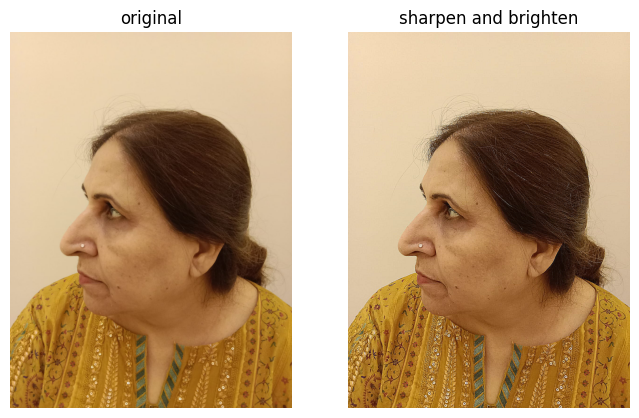

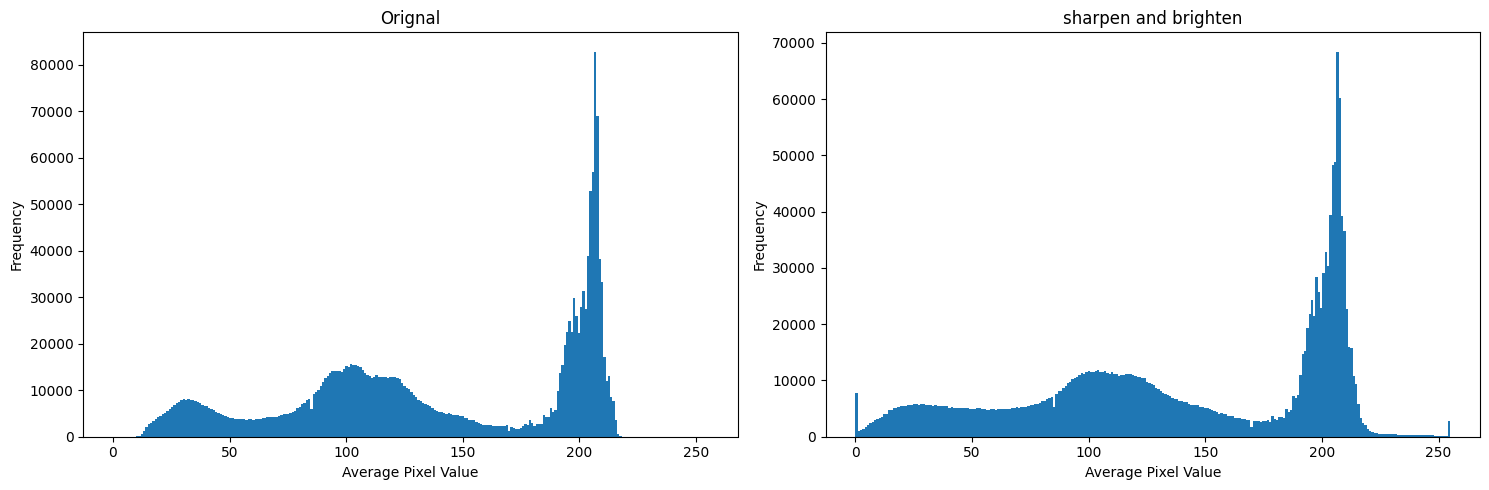

In [ ]:
transform = A.Compose([
   A.Sharpen(alpha=(1.0,1.0),lightness=(1.0,1.0),always_apply=True),
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0,0),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "sharpen and brighten")
pixel_frequency_comparison(img, transformed_image, "sharpen and brighten")
# fourier_comparison(img, transformed_image, "sharpen and brighten")
# rgb_values_comparison(img, transformed_image, "sharpen and brighten")
# image_stats_comparison(img, transformed_image, "sharpen and brighten")

# 7. Median Blur

1. For each pixel in the input image, the median blur filter considers its neighborhood defined by the kernel size.
2. It collects the pixel values within the kernel area and sorts them in ascending order.
3. The median value (the middle value) from the sorted pixel values is then selected as the new value for the central pixel of the kernel.

This process is repeated for all pixels in the image, resulting in a new image where each pixel's value is replaced with the median value of its neighbors.It will cause the image to have a smoother appearance with reduced noise and details, as the filter tends to preserve larger structures while reducing sharp transitions.

---
#### Parameters:

* **blur_limit**: (min, max) range of the median blur effect applied to the image. Must be odd and in range [3, inf).

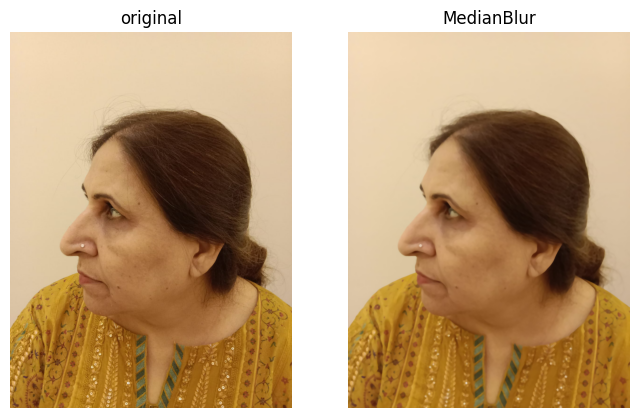

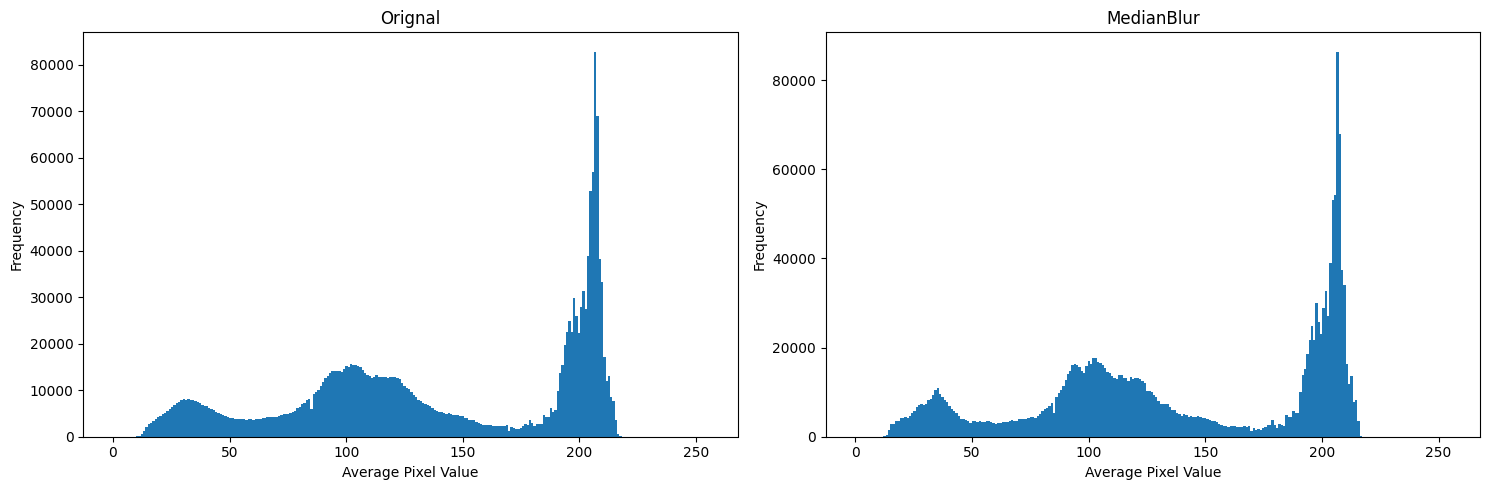

In [ ]:
transform = A.Compose([
   A.MedianBlur(blur_limit=(9,9),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "MedianBlur")
pixel_frequency_comparison(img, transformed_image, "MedianBlur")

# 8. Multiplicative Noise + Brightness

Multiplicative noise scales the pixel values by random factors, causing the image to appear darker or lighter. This type of noise is more common in scenarios where lighting conditions may vary or when working with low-light images. Each pixel value (or channel value in the case of color images) in the image will be multiplied by a random factor, which is uniformly sampled from the range [min_multiplier, max_multiplier].

A min_multiplier value less than 1.0 will make the image darker.

A max_multiplier value greater than 1.0 will make the image lighter.


---
#### Parameters:

* **multiplier**: (min, max) range of multiplier values define the minimum and maximum factors that will be used to scale the pixel values.
* **per_chcannel**: Controls whether the same random factor is applied to all color channels (per_channel=False) or if each channel is assigned a separate random factor (per_channel=True).
* **elementwise**: If True, each individual pixel value (or channel value) is multiplied by a unique random factor.
If False, the entire image (or color channels) is scaled by the same random factor.

__
* **brightness_limit**: The brightness limit controls the range of random brightness adjustments

* **contrast_limit**: The contrast limit controls the range of random contrast adjustments

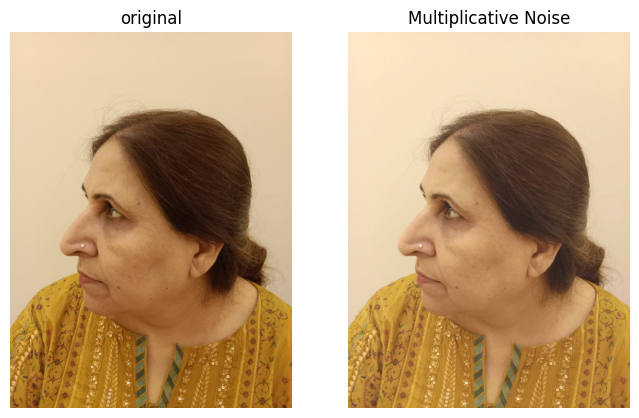

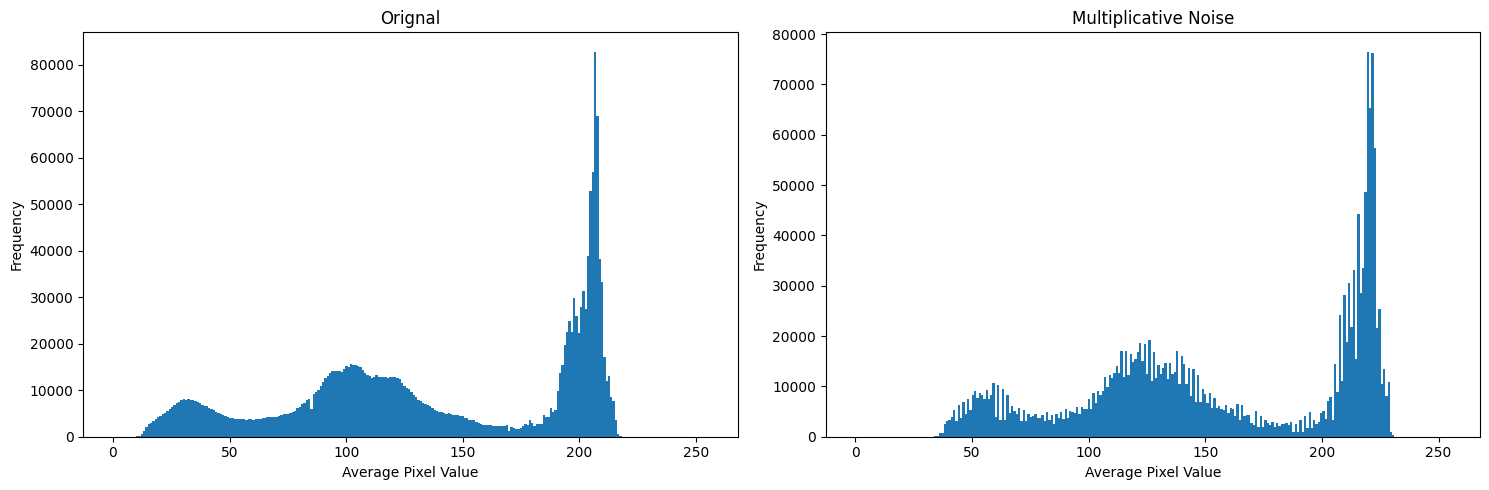

In [ ]:
transform = A.Compose([
 A.MultiplicativeNoise (multiplier=(0.5, 0.5), per_channel=False, elementwise=False,always_apply=True),
 A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.9,0.9),always_apply=True)
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Multiplicative Noise")
pixel_frequency_comparison(img, transformed_image, "Multiplicative Noise")
# fourier_comparison(img, transformed_image, "Multiplicative Noise")
# rgb_values_comparison(img, transformed_image, "Multiplicative Noise")
# image_stats_comparison(img, transformed_image, "Multiplicative Noise")

# 9. Downscale

 The input image is downsized using a randomly chosen scaling factor form the range, and interpolation is used to determine the pixel values of the downscaled image. The interpolation method influences the appearance and quality of the downscaled image.The default interpolation method is typically Nearest-neighbor Interpolation, which takes into account the weighted average of the four nearest pixels in the original image to compute the pixel value of each pixel in the downscaled image.

---
#### Parameters:

* **scale_min**: Lower bound of range
* **scal_max**: Upper bound of range
* **interpolation**: Type of interpolation


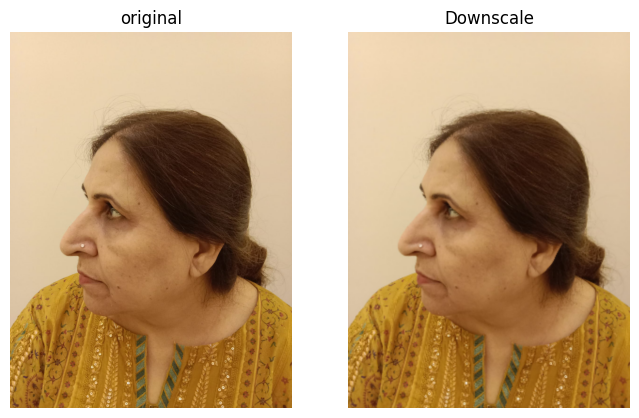

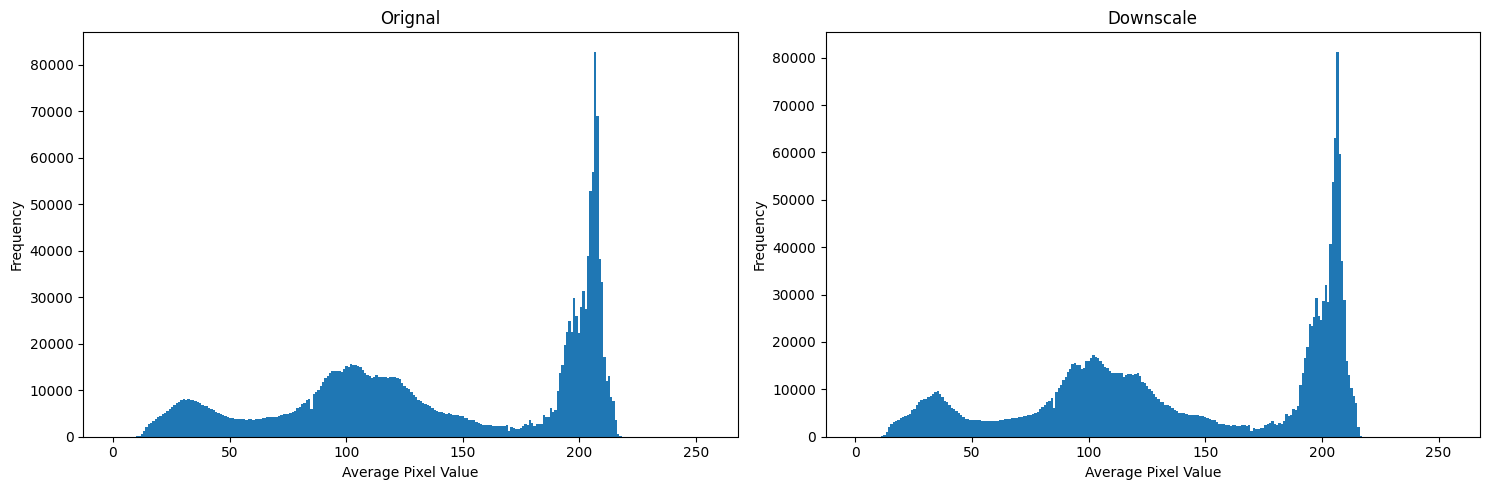

In [ ]:
transform = A.Compose([
   A.Downscale (scale_min=0.25, scale_max=0.25, interpolation=None,always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Downscale")
pixel_frequency_comparison(img, transformed_image, "Downscale")
# rgb_values_comparison(img, transformed_image, "Downscale")
# image_stats_comparison(img, transformed_image, "Downscale")

In [ ]:
transformed_image = random_noise(img,mode='s&p')
plot_comparison(img,transformed_image,'Noisy Image')
pixel_frequency_comparison(img,transformed_image,'Noisy Image')
fourier_comparison(img, transformed_image, "Noisy Image")
rgb_values_comparison(img, transformed_image, "Noisy Image")
image_stats_comparison(img, transformed_image, "Noisy Image")

In [ ]:
transform = A.Compose([
   A.Superpixels(p_replace=0.1, n_segments=5, max_size=512, interpolation=0,always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Superpixels")
pixel_frequency_comparison(img, transformed_image, "Superpixels")
rgb_values_comparison(img, transformed_image, "Superpixels")
image_stats_comparison(img, transformed_image, "Superpixels")

In [ ]:
transform = A.FancyPCA(alpha=0.3, p=1.0)

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "FancyPCA")
# pixel_frequency_comparison(img, transformed_image, "FancyPCA")
# rgb_values_comparison(img, transformed_image, "FancyPCA")
image_stats_comparison(img, transformed_image, "FancyPCA")

In [ ]:
transform = A.Compose([
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.3),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Brightness")
pixel_frequency_comparison(img, transformed_image, "Brightness")

In [ ]:
transform = A.Compose([
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.05,0.05),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Brightness and Contrast")
pixel_frequency_comparison(img, transformed_image, "Brightness and Contrast")

In [ ]:
transform = A.Compose([
   A.HueSaturationValue (hue_shift_limit=(0,0), sat_shift_limit=(15,15), val_shift_limit=0, always_apply=True),
   A.RandomBrightnessContrast(brightness_limit=(0.1,0.1),contrast_limit=(0.05,0.05),always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Saturation")
pixel_frequency_comparison(img, transformed_image, "Saturation")

In [ ]:
transform = A.Compose([
   A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=True),
   A.HueSaturationValue (hue_shift_limit=(0,0), sat_shift_limit=(1,1), val_shift_limit=0, always_apply=True),
])

transformed = transform(image=img)
transformed_image = transformed["image"]

plot_comparison(img, transformed_image, "Normalize")
pixel_frequency_comparison(img, transformed_image, "Normalize")
image_stats_comparison(img, transformed_image, "Normalize")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fourier_transform(image_path):
    # Open the image using PIL
    img = Image.open(image_path)

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Perform the 2D Fourier Transform on each color channel separately
    f_transform_r = np.fft.fft2(img_array[:, :, 0])
    f_transform_g = np.fft.fft2(img_array[:, :, 1])
    f_transform_b = np.fft.fft2(img_array[:, :, 2])

    # Shift the zero frequency component to the center of the spectrum
    f_transform_shifted_r = np.fft.fftshift(f_transform_r)
    f_transform_shifted_g = np.fft.fftshift(f_transform_g)
    f_transform_shifted_b = np.fft.fftshift(f_transform_b)

    # Calculate the magnitude spectrum (log-scaled for visualization) for each channel
    magnitude_spectrum_r = np.abs(f_transform_shifted_r)
    magnitude_spectrum_g = np.abs(f_transform_shifted_g)
    magnitude_spectrum_b = np.abs(f_transform_shifted_b)

    magnitude_spectrum_log_r = np.log(magnitude_spectrum_r + 1)  # Adding 1 to avoid log(0)
    magnitude_spectrum_log_g = np.log(magnitude_spectrum_g + 1)
    magnitude_spectrum_log_b = np.log(magnitude_spectrum_b + 1)

    # Display the original image and the Fourier Transform magnitude for each channel
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(magnitude_spectrum_log_r, cmap='gray')
    axes[1].set_title('Magnitude Spectrum (Red Channel)')
    axes[1].axis('off')

    axes[2].imshow(magnitude_spectrum_log_g, cmap='gray')
    axes[2].set_title('Magnitude Spectrum (Green Channel)')
    axes[2].axis('off')

    axes[3].imshow(magnitude_spectrum_log_b, cmap='gray')
    axes[3].set_title('Magnitude Spectrum (Blue Channel)')
    axes[3].axis('off')

    plt.show()

# Example usage
image_path = 'image.jpg'
fourier_transform(img_path)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_morphology_filters(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Define a kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion_image = cv2.erode(binary_image, kernel, iterations=1)
    dilation_image = cv2.dilate(binary_image, kernel, iterations=1)
    opening_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    # Display the images using matplotlib
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    axes[0, 0].imshow(binary_image, cmap='gray')
    axes[0, 0].set_title('Binary Image')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(erosion_image, cmap='gray')
    axes[0, 1].set_title('Erosion')
    axes[0, 1].axis('off')

    axes[0, 2].imshow(dilation_image, cmap='gray')
    axes[0, 2].set_title('Dilation')
    axes[0, 2].axis('off')

    axes[1, 0].imshow(opening_image, cmap='gray')
    axes[1, 0].set_title('Opening')
    axes[1, 0].axis('off')

    axes[1, 1].imshow(closing_image, cmap='gray')
    axes[1, 1].set_title('Closing')
    axes[1, 1].axis('off')

    # Show only the first two subplots (binary and erosion)
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
image_path = 'image.jpg'
apply_morphology_filters(img_path)


In [ ]:
#  This technique is typically used to blur an image or to reduce noise.
# 'channel_axis' boolean parameter is set to True if the image is colored, otherwise it needs to be set to False
gaussian_image = gaussian(img, channel_axis=True)
plot_comparison(img, gaussian_image, "Blurred with Gaussian filter")
# pixel_frequency_comparison(img,gaussian_image,"Blurred with Gaussian filter")

In [ ]:
# Histogram equalization (spreads out the most frequent histogram intensity values using probability distribution)
image_eq = exposure.equalize_hist(img,nbins=256)
plot_comparison(img,image_eq,'Histogram equalized')
pixel_frequency_comparison(img,image_eq,'Histogram equalized')

In [ ]:
# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(img, clip_limit=0.5)
plot_comparison(img,image_adapteq,'Adaptive equalized')
pixel_frequency_comparison(img,image_adapteq,'Adaptive equalized')

In [ ]:
sharp_image = img.filter(ImageFilter.SHARPEN)
plot_comparison(img,sharp_image,'Sharpen Image')
pixel_frequency_comparison(img,sharp_image,'Edge image')

In [ ]:
img = Image.open('/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/ha1.JPG')
img_cat_gray = img.convert("L")
plt.imshow(img_cat_gray)
threshold = 100
img_cat_threshold = img_cat_gray.point(
    lambda x: 255 if x > threshold else 0
)
plt.imshow(img_cat_threshold)

In [ ]:
def erode(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MinFilter(3))
    return image


def dilate(cycles, image):
    for _ in range(cycles):
         image = image.filter(ImageFilter.MaxFilter(3))
    return image


In [ ]:
step_1 = erode(12, img_cat_threshold)
plt.imshow(step_1)

In [ ]:
step_2 = dilate(58, step_1)
plt.imshow(step_2)

In [ ]:
cat_mask = erode(45, step_2)
plt.imshow(cat_mask)

In [ ]:
cat_mask = cat_mask.convert("L")
cat_mask = cat_mask.filter(ImageFilter.BoxBlur(20))
plt.imshow(cat_mask)

In [ ]:
blank = img.point(lambda _: 0)
cat_segmented = Image.composite(img, blank, cat_mask)
plt.imshow(cat_segmented)